#Machine Learning (Classification: Model Comparison & Insights)

Encode categorical variables such as region, category, and payment_type appropriately (you can use one-hot encoding or label encoding).

Split the data into training (80%) and testing (20%) sets with stratification based on the target column returned.

Train three models:

SVM,
Random Forest,
XGBoost


Evaluate all three models using:
Accuracy (percentage of correctly predicted records)
Log Loss (how well predicted probabilities match actual outcomes)
Confusion Matrix
Choose the best-performing model and display its feature importances.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('orders_return.csv')
df.head()

order_id  customer_id  order_date region  category  quantity  unit_price  \
0         1          103  2022-11-01  North  Skincare         4      227.69   
1         2          271  2023-03-05  North  Haircare         1      317.61   
2         3          107  2023-04-22  North  Clothing         3      246.09   
3         4           72  2022-10-13   East  Haircare         1      137.58   
4         5          189  2022-05-24   East  Skincare         4      245.81   

   discount payment_type  campaign_flag  order_value  returned  
0         0         Card              1       910.76         1  
1        10         Card              0       285.85         0  
2         0       Wallet              0       738.27         0  
3         5         Card              0       130.70         0  
4         0         Card              0       983.24         1

In [ ]:
print(df.columns)      # Check the columns names

print('----------------------------------')

print(df.dtypes)      # Check data Types

print('----------------------------------')

print(df.shape)      # Check the shape of the data

print('----------------------------------')

print(df.info())     #Check all the details at ones

print('----------------------------------')

print(df.isna().sum())   # check the null values

print('----------------------------------')

print(df.duplicated().sum())    # check the duplicates



Index(['order_id', 'customer_id', 'order_date', 'region', 'category',
       'quantity', 'unit_price', 'discount', 'payment_type', 'campaign_flag',
       'order_value', 'returned'],
      dtype='object')
----------------------------------
order_id           int64
customer_id        int64
order_date        object
region            object
category          object
quantity           int64
unit_price       float64
discount           int64
payment_type      object
campaign_flag      int64
order_value      float64
returned           int64
dtype: object
----------------------------------
(1000, 12)
----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       1000 non-null   int64  
 1   customer_id    1000 non-null   int64  
 2   order_date     1000 non-null   object 
 3   region         1000 non-null   obj

In [ ]:
df['returned'].value_counts()

returned
0    888
1    112
Name: count, dtype: int64

In [ ]:
df["order_date"] = pd.to_datetime(df["order_date"])
df["order_date"] = df["order_date"].astype("int64")


#Encoding

In [ ]:
#one hot encoding
df=pd.get_dummies(df,columns=['region','category','payment_type'],dtype=int)

In [ ]:
df.head()

order_id  customer_id           order_date  quantity  unit_price  discount  \
0         1          103  1667260800000000000         4      227.69         0   
1         2          271  1677974400000000000         1      317.61        10   
2         3          107  1682121600000000000         3      246.09         0   
3         4           72  1665619200000000000         1      137.58         5   
4         5          189  1653350400000000000         4      245.81         0   

   campaign_flag  order_value  returned  region_East  ...  category_Clothing  \
0              1       910.76         1            0  ...                  0   
1              0       285.85         0            0  ...                  0   
2              0       738.27         0            0  ...                  1   
3              0       130.70         0            1  ...                  0   
4              0       983.24         1            1  ...                  0   

   category_Electronics  category_Haircare  category_Makeup  \
0                     0                  0                0   
1                     0                  1                0   
2                     0                  0                0   
3                     0                  1                0   
4                     0                  0                0   

   category_Oralcare  category_Skincare  payment_type_COD  payment_type_Card  \
0                  0                  1                 0                  1   
1                  0                  0                 0                  1   
2                  0                  0                 0                  0   
3                  0                  0                 0                  1   
4                  0                  1                 0                  1   

   payment_type_UPI  payment_type_Wallet  
0                 0                    0  
1                 0                    0  
2                 0                    1  
3                 0                    0  
4                 0                    0  

[5 rows x 23 columns]

In [ ]:
!pip install ydata_profiling

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
profile=ProfileReport(df,title='Profiling_Report',explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 23/23 [00:01<00:00, 16.95it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
X=df.drop('returned',axis=1)
y=df['returned']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_s, y_train_s = smote.fit_resample(X_train, y_train)


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#svm

In [ ]:
from sklearn import svm
svm_model=svm.SVC(class_weight='balanced',random_state=42)
svm_model.fit(X_train_s,y_train_s)

SVC(class_weight='balanced', random_state=42)

# Randomforest

In [ ]:
rf_model=RandomForestClassifier(class_weight='balanced',
                                n_estimators=300
                                ,random_state=42)
rf_model.fit(X_train_s,y_train_s)

RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

# XGBOOST

In [ ]:
xgb = XGBClassifier(eval_metric="logloss",
                     n_estimators=300,
                     random_state=42,
                    )
xgb.fit(X_train_s, y_train_s)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
svm_pred=svm_model.predict(X_test)
rf_pred=rf_model.predict(X_test)
xgb_pred=xgb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score,log_loss, confusion_matrix,classification_report

In [ ]:
print('svm roc_auc',roc_auc_score(y_test,svm_pred))
print('rf roc_auc',roc_auc_score(y_test,rf_pred))
print('xgb roc_auc',roc_auc_score(y_test,xgb_pred))

svm roc_auc 0.4660367722165475
rf roc_auc 0.4943820224719101
xgb roc_auc 0.5457099080694585


In [ ]:
print('svm log_loss',(y_test,svm_pred))
print('rf log_loss',(y_test,rf_pred))
print('xgb log_loss',(y_test,xgb_pred))

svm log_loss (443    0
941    0
531    0
626    0
646    0
      ..
455    0
874    0
238    0
491    1
549    0
Name: returned, Length: 200, dtype: int64, array([0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1]))
rf log_loss (443    0
941    0
531    0
626    0
646    0
      ..
455    0
874    0
238    0
491    1
549    0
Name: returned, Length: 200, dtype: int64, array([0, 0, 0, 0

In [ ]:
print('svm confision matrix',confusion_matrix(y_test,svm_pred))
print('rf comfision matrix',confusion_matrix(y_test,rf_pred))
print('xgb confision matrix',confusion_matrix(y_test,xgb_pred))


svm confision matrix [[85 93]
 [12 10]]
rf comfision matrix [[176   2]
 [ 22   0]]
xgb confision matrix [[170   8]
 [ 19   3]]


In [ ]:
best_model = xgb

In [ ]:
# feature importance
pd.DataFrame({
   "feature": X.columns,
   "importance": best_model.feature_importances_
}).sort_values(by="importance", ascending=False)

feature  importance
11           region_West    0.144697
18      payment_type_COD    0.141700
9           region_North    0.120257
12     category_Clothing    0.089169
10          region_South    0.074042
21   payment_type_Wallet    0.071289
8            region_East    0.057327
20      payment_type_UPI    0.041798
13  category_Electronics    0.040475
16     category_Oralcare    0.037680
17     category_Skincare    0.028165
19     payment_type_Card    0.027334
14     category_Haircare    0.026874
15       category_Makeup    0.026864
3               quantity    0.016269
2             order_date    0.010504
6          campaign_flag    0.008587
1            customer_id    0.007822
0               order_id    0.007748
5               discount    0.007745
4             unit_price    0.006996
7            order_value    0.006656

#QUESTION 2

Machine Learning (Feature Engineering & Model Evaluation)
Use: orders_return.csv Steps:

Create new features:
total_discount = total discount in money terms (multiply unit_price, quantity, and discount / 100)

order_month = extract the month number from order_date

interaction term = multiply discount and campaign_flag (this shows how discount behaves during campaigns)

Train a Random Forest Classifier to predict returned.

Evaluate the model using:
Precision – how many predicted returns were actually correct

Recall – how many of the real returns were successfully predicted

F1-score – the balance between precision and recall (useful for imbalanced classes)

ROC Curve – draw the curve showing the trade-off between True Positive Rate and False Positive Rate

Export the feature importance chart as Q2_importance.png.


In [ ]:
df=pd.read_csv('orders_return.csv')
df.head()

order_id  customer_id  order_date region  category  quantity  unit_price  \
0         1          103  2022-11-01  North  Skincare         4      227.69   
1         2          271  2023-03-05  North  Haircare         1      317.61   
2         3          107  2023-04-22  North  Clothing         3      246.09   
3         4           72  2022-10-13   East  Haircare         1      137.58   
4         5          189  2022-05-24   East  Skincare         4      245.81   

   discount payment_type  campaign_flag  order_value  returned  
0         0         Card              1       910.76         1  
1        10         Card              0       285.85         0  
2         0       Wallet              0       738.27         0  
3         5         Card              0       130.70         0  
4         0         Card              0       983.24         1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       1000 non-null   int64  
 1   customer_id    1000 non-null   int64  
 2   order_date     1000 non-null   object 
 3   region         1000 non-null   object 
 4   category       1000 non-null   object 
 5   quantity       1000 non-null   int64  
 6   unit_price     1000 non-null   float64
 7   discount       1000 non-null   int64  
 8   payment_type   1000 non-null   object 
 9   campaign_flag  1000 non-null   int64  
 10  order_value    1000 non-null   float64
 11  returned       1000 non-null   int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 93.9+ KB


In [ ]:
#Feature engineering
df['total_discount']=df['unit_price']*df['quantity']*df['discount']/100

In [ ]:
df["order_month"] = pd.to_datetime(df["order_date"]).dt.month
df = df.drop("order_date", axis=1)
df["interaction_term"] = df["discount"]*df["campaign_flag"]


In [ ]:
#Encoding
df=pd.get_dummies(df,columns=['region','category','payment_type'],dtype=int)

In [ ]:
#split x and y
X=df.drop(columns=['returned'])
y=df['returned']


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(class_weight="balanced", random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
y_prob = rf.predict_proba(X_test)[:, 1]

In [ ]:
y_pred = (y_prob >= 0.3).astype(int)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve,roc_auc_score,roc_curve

In [ ]:
print("Precision:", precision_score(y_test, y_pred,zero_division=1))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))


Precision: 0.2222222222222222
Recall: 0.09090909090909091
F1-score: 0.12903225806451613


In [ ]:
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

ROC AUC Score: 0.5543922369765065


In [ ]:
fp, tp, _ = roc_curve(y_test, y_prob)

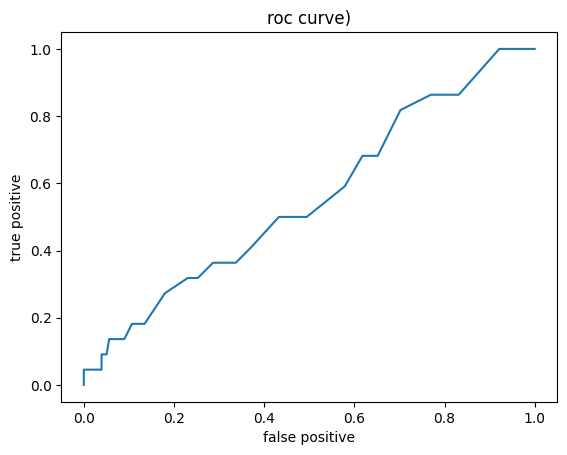

In [ ]:
plt.figure()
plt.plot(fp, tp)
plt.xlabel("false positive")
plt.ylabel("true positive")
plt.title("roc curve)")
plt.savefig("roc_curve.png")
plt.show()

In [ ]:
importances = rf.feature_importances_
feature = pd.Series(importances, index=X.columns).sort_values(ascending=False)


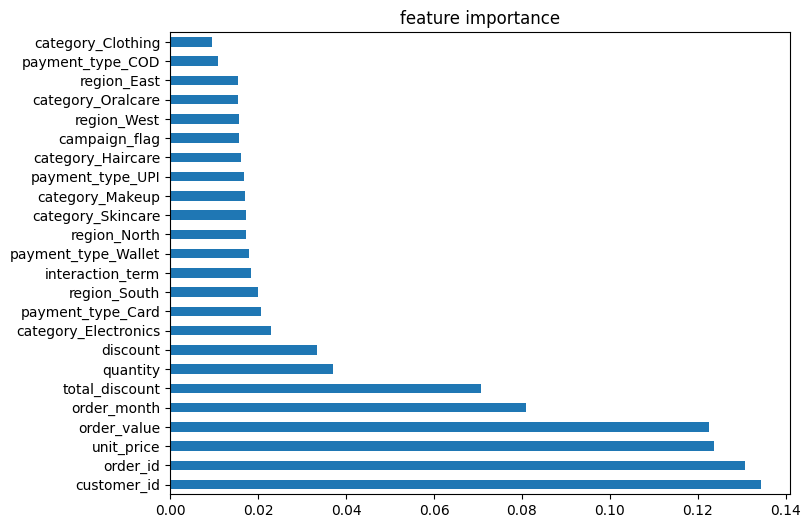

In [ ]:
plt.figure(figsize=(8,6))
feature.plot(kind="barh")
plt.title("feature importance")
plt.savefig("Q2_importance.png")
plt.show()

#Question 3

Machine Learning (Time Series Forecasting & Error Metrics)
Use: monthly_revenue.csv Steps:

Aggregate revenue by month and region.

Train a SARIMA model for each region using the first 24 months of data.
Forecast the next 6 months for each region.

Plot actual vs. predicted values for all regions together on one graph.
Evaluate forecasts using:

Mean Absolute Error (MAE) – average size of prediction errors (ignoring direction)

Root Mean Squared Error (RMSE) – larger errors receive more weight since errors are squared before averaging

List the RMSE values for all regions in ascending order (best to worst).

In [ ]:
tm=pd.read_csv('monthly_revenue.csv')
tm.head()

month region  monthly_revenue
0  2021-01  North        140911.10
1  2021-02  North        189499.33
2  2021-03  North        218203.54
3  2021-04  North        269938.48
4  2021-05  North        275596.07

In [ ]:
tm.shape

(144, 3)

In [ ]:
tm.dtypes

month               object
region              object
monthly_revenue    float64
dtype: object

In [ ]:
tm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   month            144 non-null    object 
 1   region           144 non-null    object 
 2   monthly_revenue  144 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.5+ KB


In [ ]:
tm.isna().sum()

month              0
region             0
monthly_revenue    0
dtype: int64

In [ ]:
tm.duplicated().sum()

np.int64(0)

In [ ]:
#Aggregate revenue by month and region.
tm["month"] = pd.to_datetime(tm["month"]).dt.to_period("M")
tm=tm.groupby(['region','month'])['monthly_revenue'].sum().reset_index()


In [ ]:
tm

region    month  monthly_revenue
0     East  2021-01         98881.81
1     East  2021-02        124656.21
2     East  2021-03        135471.04
3     East  2021-04        156784.93
4     East  2021-05        169494.95
..     ...      ...              ...
139   West  2023-08        145671.30
140   West  2023-09        132431.18
141   West  2023-10        109038.43
142   West  2023-11         66908.52
143   West  2023-12         66069.31

[144 rows x 3 columns]

In [ ]:
tm['region'].unique()

array(['East', 'North', 'South', 'West'], dtype=object)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
regions = tm["region"].unique()


In [ ]:
rmse_results = {}
all_forecasts = {}

In [ ]:
for r in regions:
    data = tm[tm["region"] == r].set_index("month")
    train = data["monthly_revenue"][:24]
    test  = data["monthly_revenue"][24:]
    model = SARIMAX(train, order=(1,0,1))
    fit = model.fit(disp=False)
    forecast = fit.forecast(6)
    all_forecasts[r] = (test[:6], forecast)
    rmse = np.sqrt(mean_squared_error(test[:6], forecast))
    rmse_results[r] = rmse
    print(r, "RMSE:", rmse)

East RMSE: 94915.74994981042
North RMSE: 129181.99577986287


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


South RMSE: 164517.62247689493
West RMSE: 47109.536094311


TypeError: float() argument must be a string or a real number, not 'Period'

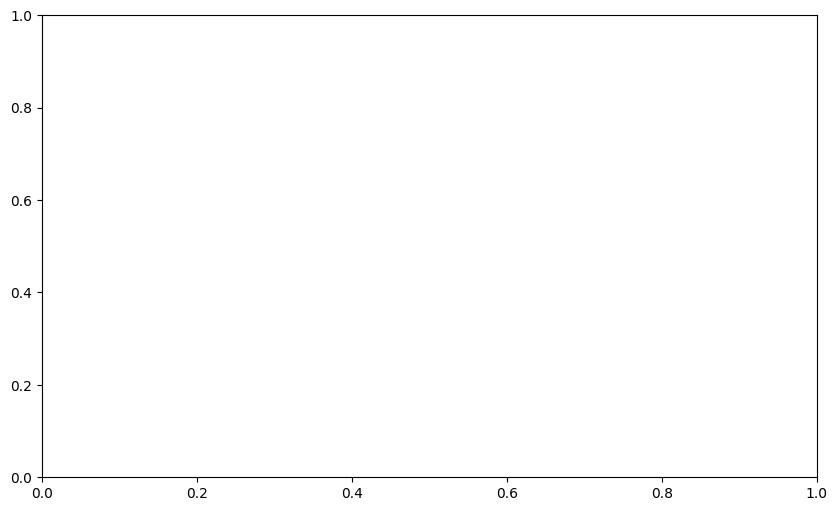

In [ ]:
plt.figure(figsize=(10,6))
for r in regions:
    actual, pred = all_forecasts[r]
    plt.plot(actual.index, actual)
    plt.plot(pred.index, pred, "--")
plt.title("Actual vs Forecast")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()
